In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sn

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Brain-size.csv")
df

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [3]:
df.shape

(237, 4)

In [4]:
df.dtypes

Gender         int64
AgeRange       int64
HeadSize       int64
BrainWeight    int64
dtype: object

In [5]:
df.isnull().sum()

Gender         0
AgeRange       0
HeadSize       0
BrainWeight    0
dtype: int64

In [6]:
df.describe()

,Gender,AgeRange,HeadSize,BrainWeight
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


# EDA

<AxesSubplot:xlabel='HeadSize', ylabel='Density'>

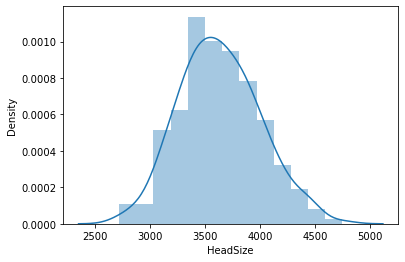

In [7]:
sn.distplot(df["HeadSize"])

<AxesSubplot:xlabel='BrainWeight', ylabel='Density'>

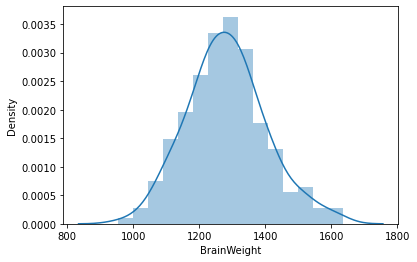

In [8]:
sn.distplot(df["BrainWeight"])

<AxesSubplot:xlabel='AgeRange', ylabel='Density'>

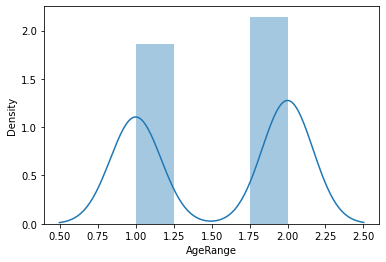

In [9]:
sn.distplot(df["AgeRange"])

<AxesSubplot:xlabel='BrainWeight', ylabel='count'>

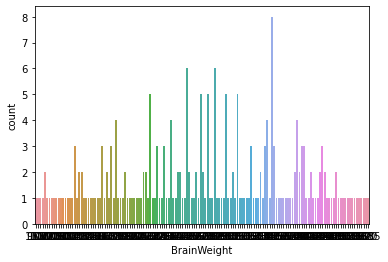

In [10]:
sn.countplot(df["BrainWeight"])

<AxesSubplot:xlabel='AgeRange', ylabel='count'>

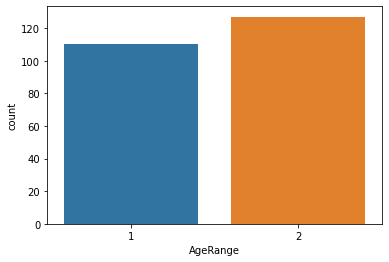

In [11]:
sn.countplot(df["AgeRange"])

<AxesSubplot:title={'center':'comparison between HeadSize and BrainWeight'}, xlabel='BrainWeight', ylabel='HeadSize'>

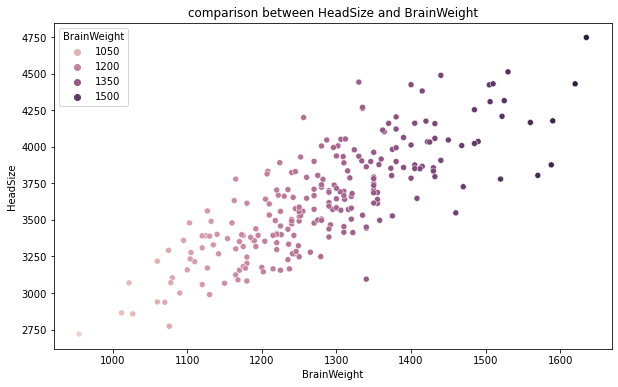

In [12]:

plt.figure(figsize=[10,6])
plt.title("comparison between HeadSize and BrainWeight")
sn.scatterplot(df['BrainWeight'],df['HeadSize'],hue=df["BrainWeight"])

<AxesSubplot:title={'center':'comparison between AgeRange and BrainWeight'}, xlabel='BrainWeight', ylabel='AgeRange'>

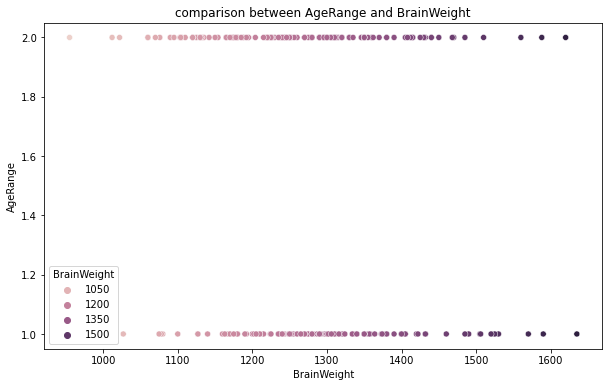

In [13]:
plt.figure(figsize=[10,6])
plt.title("comparison between AgeRange and BrainWeight")
sn.scatterplot(df['BrainWeight'],df['AgeRange'],hue=df["BrainWeight"])

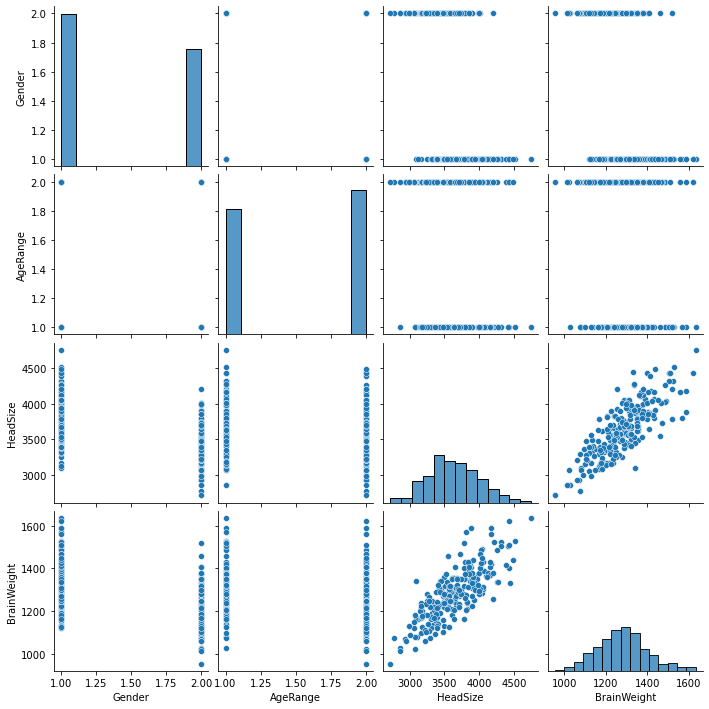

In [14]:
sn.pairplot(df)

In [15]:
cor=df.corr()
cor

,Gender,AgeRange,HeadSize,BrainWeight
Gender,1.000000,-0.088652,-0.514050,-0.465266
AgeRange,-0.088652,1.000000,-0.105428,-0.169438
HeadSize,-0.514050,-0.105428,1.000000,0.799570
BrainWeight,-0.465266,-0.169438,0.799570,1.000000


<AxesSubplot:>

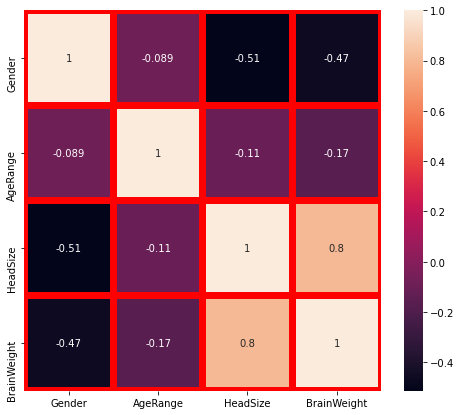

In [16]:
plt.figure(figsize=[8,7])
sn.heatmap(cor,annot=True,linewidths=6,linecolor='r')

In [17]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df1=df[(z<3).all(axis=1)]

In [18]:
df1.skew()

Gender         0.257959
AgeRange      -0.153968
HeadSize       0.164767
BrainWeight    0.205274
dtype: float64

arr : [array_like] Input array or object for which Z-score is to be calculated.
axis : Axis along which the mean is to be computed. By default axis = 0.
ddof : Degree of freedom correction for Standard Deviation.

Results : Z-score of the input data.

# Dividing into X and Y data

In [19]:
x=df.drop(["BrainWeight"],axis=1)
y=df["BrainWeight"]

In [20]:
x

,Gender,AgeRange,HeadSize
0,1,1,4512
1,1,1,3738
2,1,1,4261
3,1,1,3777
4,1,1,4177
...,...,...,...
232,2,2,3214
233,2,2,3394
234,2,2,3233
235,2,2,3352


In [21]:
y

0      1530
1      1297
2      1335
3      1282
4      1590
       ... 
232    1110
233    1215
234    1104
235    1170
236    1120
Name: BrainWeight, Length: 237, dtype: int64

# scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

# Splitting the Data for Training and Testing

In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr=LinearRegression()


The r2_score function computes the coefficient of determination, usually denoted as R².


In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=57)

In [34]:
x_train.shape

(184, 3)

In [36]:
x_test.shape

(53, 3)

In [37]:
y_train.shape

(184,)

In [38]:
y_test.shape

(53,)

In [39]:
lr.fit(x_train,y_train)

LinearRegression()

In [40]:
lr.coef_

array([-27.11784596, -22.25022968, 517.84254495])

In [41]:
lr.intercept_

1071.6652838088498

In [42]:
pred_test=lr.predict(x_test)

In [43]:
print("predicted value is",pred_test)
print("actual value is",y_test)

predicted value is [1242.00346799 1256.85863899 1427.51419894 1489.33851856 1473.75470246
 1222.88081043 1311.23648707 1417.29530313 1271.42056551 1196.52938165
 1187.35650673 1108.64687773 1164.59533226 1389.95975685 1179.43686248
 1331.73618206 1194.48560249 1373.08493799 1226.96836875 1091.01928246
 1266.8220624  1281.60168923 1318.15837304 1035.83724511 1227.46567276
 1345.78716379 1184.55995116 1221.60344846 1486.27284982 1405.54357296
 1202.18754643 1077.73471791 1181.71198273 1251.48007791 1289.80093718
 1260.67708413 1213.42833181 1388.17145009 1194.48560249 1243.06312965
 1346.55358098 1355.7505872  1184.80178278 1273.19523149 1218.79325211
 1231.29775869 1262.24769058 1204.99774277 1156.44434691 1306.95535973
 1215.98305576 1350.8724804  1183.7557619 ]
actual value is 211    1320
131    1335
121    1256
62     1330
69     1415
107    1226
203    1405
90     1370
116    1250
206    1220
156    1265
196    1120
202    1105
128    1312
166    1250
1      1297
233    1215
158    

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("mean absoute value",mean_absolute_error(y_test,pred_test))
print("mean squared error",mean_squared_error(y_test,pred_test))
print ("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test)))

mean absoute value 55.55010607045152
mean squared error 4625.345650826395
Root mean squared error 68.00989377161528


In [47]:
print(r2_score(y_test,pred_test))

0.5456445448103131


# SVR(linear)

In [48]:
from sklearn.svm import SVR

svr = SVR(kernel='linear')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

0.16800714071008538


In [49]:
print('MSE:',mean_squared_error(svr_predict,y_test))
print('MAE:',mean_absolute_error(svr_predict,y_test))
print('r2_score:',r2_score(svr_predict,y_test))

MSE: 8799.296881802606
MAE: 70.06572654914521
r2_score: -28.716897091664734


# SVR POLY

In [50]:
svr_p = SVR(kernel='poly')
svr_p.fit(x_train,y_train)
print(svr_p.score(x_train,y_train))
svrpred_p=svr_p.predict(x_test)

0.44195652022120213


In [51]:
print('MSE:',mean_squared_error(svrpred_p,y_test))
print('MAE:',mean_absolute_error(svrpred_p,y_test))
print('r2_score:',r2_score(svrpred_p,y_test))

MSE: 5209.018964031675
MAE: 54.77702016257886
r2_score: -0.44458345365798246


# SVR rbf

In [52]:
svr_r = SVR(kernel='rbf')
svr_r.fit(x_train,y_train)
print(svr_r.score(x_train,y_train))
svrpred_r=svr_r.predict(x_test)

0.1440051971115046


In [53]:
print('MSE:',mean_squared_error(svrpred_r,y_test))
print('MAE:',mean_absolute_error(svrpred_r,y_test))
print('r2_score:',r2_score(svrpred_r,y_test))

MSE: 9118.982686107482
MAE: 71.42539090697328
r2_score: -44.52028545337874


# RandomForest Regressor

In [54]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train,y_train)
print(rf.score(x_train,y_train))
rf_pred=rf.predict(x_test)

0.9293737555244329


In [55]:
print('MSE:',mean_squared_error(rf_pred,y_test))
print('MAE:',mean_absolute_error(rf_pred,y_test))
print('r2_score:',r2_score(rf_pred,y_test))

MSE: 6453.0475185403575
MAE: 65.16080188679246
r2_score: 0.5087777962275402


# Decision Tree Regressor

In [56]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
print(dtr.score(x_train,y_train))
dtr_pred=dtr.predict(x_test)

0.9848131173405537


In [57]:
print('MSE:',mean_squared_error(dtr_pred,y_test))
print('MAE:',mean_absolute_error(dtr_pred,y_test))
print('r2_score:',r2_score(dtr_pred,y_test))

MSE: 7267.188679245283
MAE: 69.79245283018868
r2_score: 0.4237981114462157


# Gradient Booster Regressor

In [58]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
print(gbr.score(x_train,y_train))
gbr_pred=gbr.predict(x_test)

0.8790188172145988


In [59]:
print('MSE:',mean_squared_error(gbr_pred,y_test))
print('MAE:',mean_absolute_error(gbr_pred,y_test))
print('r2_score:',r2_score(gbr_pred,y_test))

MSE: 5905.949408378356
MAE: 61.635606075557504
r2_score: 0.5304844108654381


# Regularization

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import numpy as np

In [62]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,1,10],
            'random_state':list(range(0,10)),
            'fit_intercept':[True,False],
            'selection':['cyclic', 'random']}
ls = Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.01, 'fit_intercept': True, 'random_state': 0, 'selection': 'random'}


In [63]:
ls = Lasso(alpha=0.01,random_state=0,fit_intercept=True,selection ='random')
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.5458662079479624

# cross validation

In [64]:
from sklearn.model_selection import cross_val_score 

In [65]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.5055804363452356

In [67]:
print(cross_val_score(dtr,x,y,cv=5).mean())

-0.11714958503807338


In [69]:
print(cross_val_score(svr,x,y,cv=5).mean())

-0.2820437460354432


In [71]:
print(cross_val_score(svr_r,x,y,cv=5).mean())

-0.40805415608770534


In [72]:
print(cross_val_score(svr_p,x,y,cv=5).mean())

-0.14680037938950646


In [73]:
print(cross_val_score(gbr,x,y,cv=5).mean())

0.3471087549260532


In [74]:
print(cross_val_score(rf,x,y,cv=5).mean())

0.3256767770339253


In [75]:
print(cross_val_score(lr,x,y,cv=5).mean())

0.5055914843895684


# Ensemble technique, Hyperparameter tunning

In [76]:
from sklearn.model_selection import GridSearchCV

parameters={'fit_intercept':[True,False],
            'copy_X':[True,False],
            'positive':[True,False],
            'normalize':[True,False]
           }

In [77]:
lr=LinearRegression()
clf=GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'copy_X': True, 'fit_intercept': True, 'normalize': False, 'positive': False}


In [79]:
lr=LinearRegression(copy_X =True, fit_intercept=True, normalize=False, positive=False)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

pred_decision=lr.predict(x_test)
lrs=r2_score(y_test,pred_decision)
print("R2_score",lrs*100)

lrs_score=cross_val_score(lr,x,y,cv=5)
lrc=lrs_score.mean()
print("Cross_val_score",lrc*100)

R2_score 54.56445448103131
Cross_val_score 50.55914843895684


# Saving the model

In [80]:
import joblib
joblib.dump(lr,"Final Model of Brain size project.pkl")

['Final Model of Brain size project.pkl']

# conclusion

In [81]:
loaded_model=joblib.load(open('Final Model of Brain size project.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.5456445448103131


In [82]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Predicted","Original"])

In [83]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
Predicted,1242.003468,1256.858639,1427.514199,1489.338519,1473.754702,1222.88081,1311.236487,1417.295303,1271.420566,1196.529382,...,1273.195231,1218.793252,1231.297759,1262.247691,1204.997743,1156.444347,1306.95536,1215.983056,1350.87248,1183.755762
Original,1242.003468,1256.858639,1427.514199,1489.338519,1473.754702,1222.88081,1311.236487,1417.295303,1271.420566,1196.529382,...,1273.195231,1218.793252,1231.297759,1262.247691,1204.997743,1156.444347,1306.95536,1215.983056,1350.87248,1183.755762
